# 放射線１,２　プログラミング課題

## python matplotlibを用いたグラフの描画

## ファイル入出力の方法

alpha_air.txtというファイルに電離損失と運動エネルギーの関係が与えられています．


```
1.000E-03 2.215E+02 
1.500E-03 2.342E+02 
2.000E-03 2.444E+02 
2.500E-03 2.536E+02 
3.000E-03 2.622E+02 
4.000E-03 2.784E+02 
5.000E-03 2.937E+02 
6.000E-03 3.084E+02 
...
```

ここで第１項は運動エネルギー${\rm [MeV]}$, 第２項がその運動エネルギーにおける電離損失$[{\rm MeV~cm^{2}/g}]$を示しています．

まず，練習としてこの対応関係をグラフに表してみましょう．

はじめに，`python`でファイルを開き，その中身を一行ずつ表示する基本のコードを書きます．
以下のようになります．

In [10]:
# '#'から始まる行はコメント行なので無視されます．

# 'alpha_air.txt'というファイルをopen()関数で開きます．
# 無事に開けると，ファイルオブジェクトが f という変数に代入されます．
with open('alpha_air.txt') as f:
    # ファイルの中身はfor文を用いると一行ずつ展開できます．
    for line in f:
        # print()関数で変数の内容を表示できます．
        print( line )

1.000E-03 2.215E+02 

1.500E-03 2.342E+02 

2.000E-03 2.444E+02 

2.500E-03 2.536E+02 

3.000E-03 2.622E+02 

4.000E-03 2.784E+02 

5.000E-03 2.937E+02 

6.000E-03 3.084E+02 

7.000E-03 3.225E+02 

8.000E-03 3.362E+02 

9.000E-03 3.495E+02 

1.000E-02 3.625E+02 

1.250E-02 3.933E+02 

1.500E-02 4.225E+02 

1.750E-02 4.501E+02 

2.000E-02 4.765E+02 

2.250E-02 5.018E+02 

2.500E-02 5.260E+02 

2.750E-02 5.494E+02 

3.000E-02 5.720E+02 

3.500E-02 6.150E+02 

4.000E-02 6.557E+02 

4.500E-02 6.942E+02 

5.000E-02 7.310E+02 

5.500E-02 7.661E+02 

6.000E-02 7.998E+02 

6.500E-02 8.323E+02 

7.000E-02 8.636E+02 

7.500E-02 8.938E+02 

8.000E-02 9.230E+02 

8.500E-02 9.514E+02 

9.000E-02 9.788E+02 

9.500E-02 1.006E+03 

1.000E-01 1.031E+03 

1.250E-01 1.151E+03 

1.500E-01 1.257E+03 

1.750E-01 1.352E+03 

2.000E-01 1.437E+03 

2.250E-01 1.513E+03 

2.500E-01 1.582E+03 

2.750E-01 1.643E+03 

3.000E-01 1.698E+03 

3.500E-01 1.792E+03 

4.000E-01 1.866E+03 

4.500E-01 1.923E+03 

5.000E-01 

テキストファイルは文字列なので，この時点ではプログラムは
与えられた文字列を「数値」として解釈していません．

数値として解釈するためには，まず一行の中にある
「運動エネルギー」と「電離損失」の文字列を分離する必要があります．

`split()`関数を用いるとスペースを区切り文字にして分離してくれます．
やってみましょう．

### 注意！
`python`では`for`, `if`, `while`, `with`などの「ブロック」は
「字下げ」（行の開始位置を右にずらすこと）によって表現します．

したがって，同一ブロック内では字下げの量を統一しておく必要があります．

このノートブックではブロックあたりの字下げは半角スペース4文字となっています．

* ブロック内にさらに別のブロックを作るときには字下げを深くします．
* ブロックの終了は字下げがもとに戻ることによって表現します．

In [11]:
with open('alpha_air.txt') as f:
    for line in f:
        # if you use split() then a line string will be splitted to blocks.
        # here the output elements are still string and not numbers.
        print( line.split() )

['1.000E-03', '2.215E+02']
['1.500E-03', '2.342E+02']
['2.000E-03', '2.444E+02']
['2.500E-03', '2.536E+02']
['3.000E-03', '2.622E+02']
['4.000E-03', '2.784E+02']
['5.000E-03', '2.937E+02']
['6.000E-03', '3.084E+02']
['7.000E-03', '3.225E+02']
['8.000E-03', '3.362E+02']
['9.000E-03', '3.495E+02']
['1.000E-02', '3.625E+02']
['1.250E-02', '3.933E+02']
['1.500E-02', '4.225E+02']
['1.750E-02', '4.501E+02']
['2.000E-02', '4.765E+02']
['2.250E-02', '5.018E+02']
['2.500E-02', '5.260E+02']
['2.750E-02', '5.494E+02']
['3.000E-02', '5.720E+02']
['3.500E-02', '6.150E+02']
['4.000E-02', '6.557E+02']
['4.500E-02', '6.942E+02']
['5.000E-02', '7.310E+02']
['5.500E-02', '7.661E+02']
['6.000E-02', '7.998E+02']
['6.500E-02', '8.323E+02']
['7.000E-02', '8.636E+02']
['7.500E-02', '8.938E+02']
['8.000E-02', '9.230E+02']
['8.500E-02', '9.514E+02']
['9.000E-02', '9.788E+02']
['9.500E-02', '1.006E+03']
['1.000E-01', '1.031E+03']
['1.250E-01', '1.151E+03']
['1.500E-01', '1.257E+03']
['1.750E-01', '1.352E+03']
[

さらに，`split()`した結果を`strs`（`strings`の略）という変数に格納します．

`split()`した各結果には２つの文字列が含まれていますが，それぞれには`[番号]`でアクセスできます．

In [3]:
with open('alpha_air.txt') as f:
    for line in f:
        # strs is the result of splitting
        strs = line.split()
        
        # you can access to each element by [number]
        print( "運動エネルギーは", strs[0], "で，そのときの電離損失は", strs[1], "だぞ" )

運動エネルギーは 1.000E-03 で，そのときの電離損失は 2.215E+02 だぞ
運動エネルギーは 1.500E-03 で，そのときの電離損失は 2.342E+02 だぞ
運動エネルギーは 2.000E-03 で，そのときの電離損失は 2.444E+02 だぞ
運動エネルギーは 2.500E-03 で，そのときの電離損失は 2.536E+02 だぞ
運動エネルギーは 3.000E-03 で，そのときの電離損失は 2.622E+02 だぞ
運動エネルギーは 4.000E-03 で，そのときの電離損失は 2.784E+02 だぞ
運動エネルギーは 5.000E-03 で，そのときの電離損失は 2.937E+02 だぞ
運動エネルギーは 6.000E-03 で，そのときの電離損失は 3.084E+02 だぞ
運動エネルギーは 7.000E-03 で，そのときの電離損失は 3.225E+02 だぞ
運動エネルギーは 8.000E-03 で，そのときの電離損失は 3.362E+02 だぞ
運動エネルギーは 9.000E-03 で，そのときの電離損失は 3.495E+02 だぞ
運動エネルギーは 1.000E-02 で，そのときの電離損失は 3.625E+02 だぞ
運動エネルギーは 1.250E-02 で，そのときの電離損失は 3.933E+02 だぞ
運動エネルギーは 1.500E-02 で，そのときの電離損失は 4.225E+02 だぞ
運動エネルギーは 1.750E-02 で，そのときの電離損失は 4.501E+02 だぞ
運動エネルギーは 2.000E-02 で，そのときの電離損失は 4.765E+02 だぞ
運動エネルギーは 2.250E-02 で，そのときの電離損失は 5.018E+02 だぞ
運動エネルギーは 2.500E-02 で，そのときの電離損失は 5.260E+02 だぞ
運動エネルギーは 2.750E-02 で，そのときの電離損失は 5.494E+02 だぞ
運動エネルギーは 3.000E-02 で，そのときの電離損失は 5.720E+02 だぞ
運動エネルギーは 3.500E-02 で，そのときの電離損失は 6.150E+02 だぞ
運動エネルギーは 4.000E-02 で，そのときの電離損失は 6.557E+02 だぞ
運動エネルギーは 4

やりたいことに近づいてきました！


ただし，この時点では`strs[0]`や`strs[1]`は文字列なので，「数値」としてプログラム中で解釈できていません．

ここではこれらの文字列を浮動小数点型`float`で扱いたいので，`float()`関数で変換します．

In [4]:
with open('alpha_air.txt') as f:
    for line in f:
        # strs is the result of splitting
        strs = line.split()
        
        # by using float( str ), str will convert to floating point number
        print( "運動エネルギーは", float(strs[0]), "で，電離損失は", float(strs[1]), "だぞ" )

運動エネルギーは 0.001 で，電離損失は 221.5 だぞ
運動エネルギーは 0.0015 で，電離損失は 234.2 だぞ
運動エネルギーは 0.002 で，電離損失は 244.4 だぞ
運動エネルギーは 0.0025 で，電離損失は 253.6 だぞ
運動エネルギーは 0.003 で，電離損失は 262.2 だぞ
運動エネルギーは 0.004 で，電離損失は 278.4 だぞ
運動エネルギーは 0.005 で，電離損失は 293.7 だぞ
運動エネルギーは 0.006 で，電離損失は 308.4 だぞ
運動エネルギーは 0.007 で，電離損失は 322.5 だぞ
運動エネルギーは 0.008 で，電離損失は 336.2 だぞ
運動エネルギーは 0.009 で，電離損失は 349.5 だぞ
運動エネルギーは 0.01 で，電離損失は 362.5 だぞ
運動エネルギーは 0.0125 で，電離損失は 393.3 だぞ
運動エネルギーは 0.015 で，電離損失は 422.5 だぞ
運動エネルギーは 0.0175 で，電離損失は 450.1 だぞ
運動エネルギーは 0.02 で，電離損失は 476.5 だぞ
運動エネルギーは 0.0225 で，電離損失は 501.8 だぞ
運動エネルギーは 0.025 で，電離損失は 526.0 だぞ
運動エネルギーは 0.0275 で，電離損失は 549.4 だぞ
運動エネルギーは 0.03 で，電離損失は 572.0 だぞ
運動エネルギーは 0.035 で，電離損失は 615.0 だぞ
運動エネルギーは 0.04 で，電離損失は 655.7 だぞ
運動エネルギーは 0.045 で，電離損失は 694.2 だぞ
運動エネルギーは 0.05 で，電離損失は 731.0 だぞ
運動エネルギーは 0.055 で，電離損失は 766.1 だぞ
運動エネルギーは 0.06 で，電離損失は 799.8 だぞ
運動エネルギーは 0.065 で，電離損失は 832.3 だぞ
運動エネルギーは 0.07 で，電離損失は 863.6 だぞ
運動エネルギーは 0.075 で，電離損失は 893.8 だぞ
運動エネルギーは 0.08 で，電離損失は 923.0 だぞ
運動エネルギーは 0.085 で，電離損失は 951.4 だぞ
運動エネルギーは 0

さきほどと数値の表記が変わりました！これでプログラムの中で「数値」として扱えています．

グラフを描くためには，X軸の変数列，Y軸の変数列を作ってあげる必要があります．

ここでは，`numpy`と呼ばれる強力な数値データを扱えるライブラリを使ってみます．

In [5]:
# numpyライブラリを取り込み，以下npという名前で略記します
import numpy as np

# numpy配列をひとつ作り，dataという変数に格納します．arrayとは「配列」の意味です．
data = np.array( [] )

# 以下はおなじみのファイル入力
with open('alpha_air.txt') as f:
    for line in f:
        strs = line.split()
        
        # ここでdataにappend()関数を用いて要素を追加します．appendとは「追加する」という意味です．
        data = np.append( data, [ float( strs[0] ), float( strs[1] ) ] )
        

# numpy配列はこのままだと１次元の列なので，これをN行2列の2次元の列に整形します．
# 左辺のdataは，結果をdataという変数に再代入するという意味です．
data = data.reshape(int(len(data)/2),2 )

# 結果を表示
print(data)

[[1.000e-03 2.215e+02]
 [1.500e-03 2.342e+02]
 [2.000e-03 2.444e+02]
 [2.500e-03 2.536e+02]
 [3.000e-03 2.622e+02]
 [4.000e-03 2.784e+02]
 [5.000e-03 2.937e+02]
 [6.000e-03 3.084e+02]
 [7.000e-03 3.225e+02]
 [8.000e-03 3.362e+02]
 [9.000e-03 3.495e+02]
 [1.000e-02 3.625e+02]
 [1.250e-02 3.933e+02]
 [1.500e-02 4.225e+02]
 [1.750e-02 4.501e+02]
 [2.000e-02 4.765e+02]
 [2.250e-02 5.018e+02]
 [2.500e-02 5.260e+02]
 [2.750e-02 5.494e+02]
 [3.000e-02 5.720e+02]
 [3.500e-02 6.150e+02]
 [4.000e-02 6.557e+02]
 [4.500e-02 6.942e+02]
 [5.000e-02 7.310e+02]
 [5.500e-02 7.661e+02]
 [6.000e-02 7.998e+02]
 [6.500e-02 8.323e+02]
 [7.000e-02 8.636e+02]
 [7.500e-02 8.938e+02]
 [8.000e-02 9.230e+02]
 [8.500e-02 9.514e+02]
 [9.000e-02 9.788e+02]
 [9.500e-02 1.006e+03]
 [1.000e-01 1.031e+03]
 [1.250e-01 1.151e+03]
 [1.500e-01 1.257e+03]
 [1.750e-01 1.352e+03]
 [2.000e-01 1.437e+03]
 [2.250e-01 1.513e+03]
 [2.500e-01 1.582e+03]
 [2.750e-01 1.643e+03]
 [3.000e-01 1.698e+03]
 [3.500e-01 1.792e+03]
 [4.000e-01

numpy配列を用いた結果が返ってきました！

```
[[1.000e-03 2.215e+02]
 [1.500e-03 2.342e+02]
 [2.000e-03 2.444e+02]
 ...
 [1.000e+03 1.379e+01]]
```

という数値の2次元配列の形をしています．

各要素をひとつずつ取り出すにはまた`for`文が使えます．

In [6]:
for d in data:
    print(d)

[1.000e-03 2.215e+02]
[1.500e-03 2.342e+02]
[2.000e-03 2.444e+02]
[2.500e-03 2.536e+02]
[3.000e-03 2.622e+02]
[4.000e-03 2.784e+02]
[5.000e-03 2.937e+02]
[6.000e-03 3.084e+02]
[7.000e-03 3.225e+02]
[8.000e-03 3.362e+02]
[9.000e-03 3.495e+02]
[1.000e-02 3.625e+02]
[1.250e-02 3.933e+02]
[1.500e-02 4.225e+02]
[1.750e-02 4.501e+02]
[2.000e-02 4.765e+02]
[2.250e-02 5.018e+02]
[2.50e-02 5.26e+02]
[2.750e-02 5.494e+02]
[3.00e-02 5.72e+02]
[3.50e-02 6.15e+02]
[4.000e-02 6.557e+02]
[4.500e-02 6.942e+02]
[5.00e-02 7.31e+02]
[5.500e-02 7.661e+02]
[6.000e-02 7.998e+02]
[6.500e-02 8.323e+02]
[7.000e-02 8.636e+02]
[7.500e-02 8.938e+02]
[8.00e-02 9.23e+02]
[8.500e-02 9.514e+02]
[9.000e-02 9.788e+02]
[9.500e-02 1.006e+03]
[1.000e-01 1.031e+03]
[1.250e-01 1.151e+03]
[1.500e-01 1.257e+03]
[1.750e-01 1.352e+03]
[2.000e-01 1.437e+03]
[2.250e-01 1.513e+03]
[2.500e-01 1.582e+03]
[2.750e-01 1.643e+03]
[3.000e-01 1.698e+03]
[3.500e-01 1.792e+03]
[4.000e-01 1.866e+03]
[4.500e-01 1.923e+03]
[5.000e-01 1.964e+03

ここまででグラフを描画する下準備は終わりです！

## matplotlibを用いたグラフの描画

最後に，`matplotlib`という描画ライブラリを用いて，データを描画します．

（上のファイルの読み込みと`numpy`への格納は終わっているものとします）

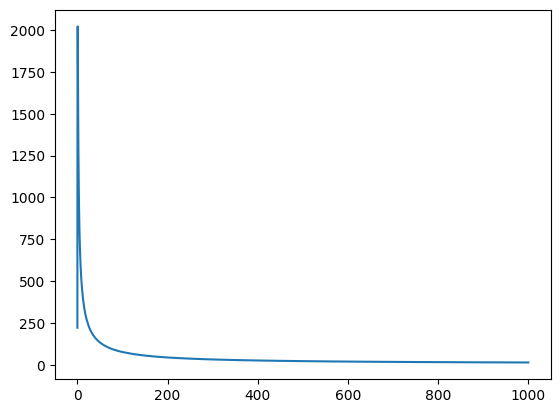

In [7]:
# matplotlibの中のpyplotというライブラリを取り込み，pltと略記
from matplotlib import pyplot as plt

plt.rcdefaults()
# plt.plot()関数でグラフを描けます．
# 2次元配列の1要素目（運動エネルギー）だけ取り出した配列を「X軸」，
# 2要素目（電離損失）だけ取り出した配列を「Y軸」として指定します．
plt.plot(data[:,0],data[:,1])
plt.show()

グラフが描けました！ただしいくつか改良点があります．

* X軸，Y軸の軸名が書かれていない
* X軸，Y軸ともに対数軸に変更したい
* 図をもう少し大きく描きたい
...

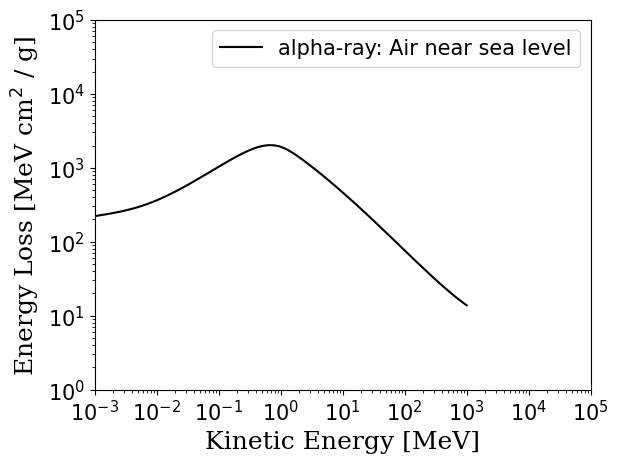

In [12]:
# x,y軸をそれぞれ対数軸に変更する
plt.yscale('log')
plt.xscale('log')

# 軸の数字を大きくする
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

# x,y軸のタイトルを設定する
plt.xlabel('Kinetic Energy [MeV]', fontsize=18, fontfamily='serif')
plt.ylabel('Energy Loss [MeV cm$^2$ / g]', fontsize=18, fontfamily='serif')

# x,y軸の範囲を手動で設定する
plt.xlim( (1.e-3, 1.e5) )
plt.ylim( (1.0, 1.e5) )


plt.plot(data[:,0],data[:,1], 'k')


# 描画する線の意味を表示する
plt.legend( ['alpha-ray: Air near sea level'], fontsize=15)
plt.show()

## まとめ

以上をまとめたコード全体は以下のようになります．

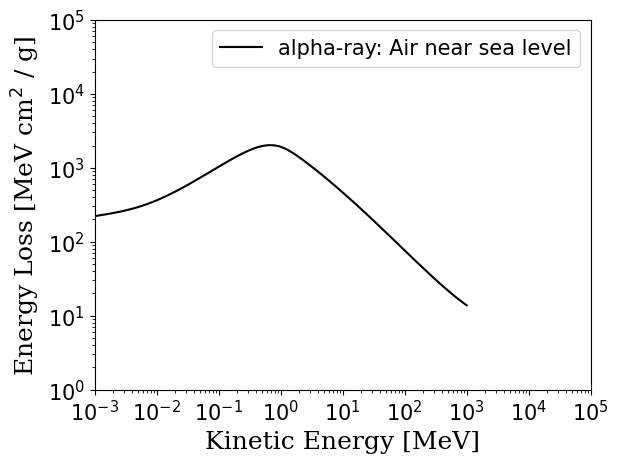

In [13]:
# numpyライブラリを取り込み，以下npという名前で略記します
import numpy as np

# numpy配列をひとつ作り，dataという変数に格納します．arrayとは「配列」の意味です．
data = np.array( [] )

# 以下はおなじみのファイル入力
with open('alpha_air.txt') as f:
    for line in f:
        strs = line.split()
        
        # ここでdataにappend()関数を用いて要素を追加します．appendとは「追加する」という意味です．
        data = np.append( data, [ float( strs[0] ), float( strs[1] ) ] )
        

# numpy配列はこのままだと１次元の列なので，これをN行2列の2次元の列に整形します．
# 左辺のdataは，結果をdataという変数に再代入するという意味です．
data = data.reshape(int(len(data)/2),2 )


# matplotlibの中のpyplotというライブラリを取り込み，pltと略記
from matplotlib import pyplot as plt

# x,y軸をそれぞれ対数軸に変更する
plt.yscale('log')
plt.xscale('log')

# 軸の数字を大きくする
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

# x,y軸のタイトルを設定する
plt.xlabel('Kinetic Energy [MeV]', fontsize=18, fontfamily='serif')
plt.ylabel('Energy Loss [MeV cm$^2$ / g]', fontsize=18, fontfamily='serif')

# x,y軸の範囲を手動で設定する
plt.xlim( (1.e-3, 1.e5) )
plt.ylim( (1.0, 1.e5) )


# 2次元配列の1要素目（運動エネルギー）だけ取り出した配列を「X軸」，
# 2要素目（電離損失）だけ取り出した配列を「Y軸」として指定します．
plt.plot(data[:,0],data[:,1], 'k')


# 描画する線の意味を表示する
plt.legend( ['alpha-ray: Air near sea level'], fontsize=15)
plt.show()